<a href="https://colab.research.google.com/github/subodh2708/deep-learning---tensorflow-2.0/blob/main/10_time_series_forecasting_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forcasting fundamentals with tensorflow + milestone project 3: BitPredict💹💰

## Get Data 

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-10-11 06:57:49--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.01s   

2022-10-11 06:57:49 (12.3 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



## Importing time-series with pandas

In [2]:
import pandas as pd

df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
                 parse_dates = ['Date'],
                 index_col = ['Date'])

df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [3]:
bitcoin_prices = pd.DataFrame(df['Closing Price (USD)']).rename(columns= {'Closing Price (USD)':'price'})
bitcoin_prices

,price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


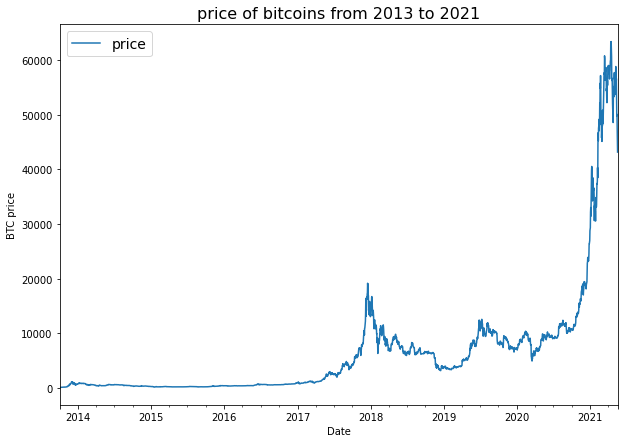

In [4]:
import matplotlib.pyplot as plt

bitcoin_prices.plot(figsize = (10,7))
plt.ylabel('BTC price')
plt.title('price of bitcoins from 2013 to 2021', fontsize= 16)
plt.legend(fontsize= 14)


## importing time series data with python CSV module

In [5]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter= ',')
  next(csv_reader)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1], '%Y-%m-%d'))
    btc_price.append(float(line[2]))

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'date')

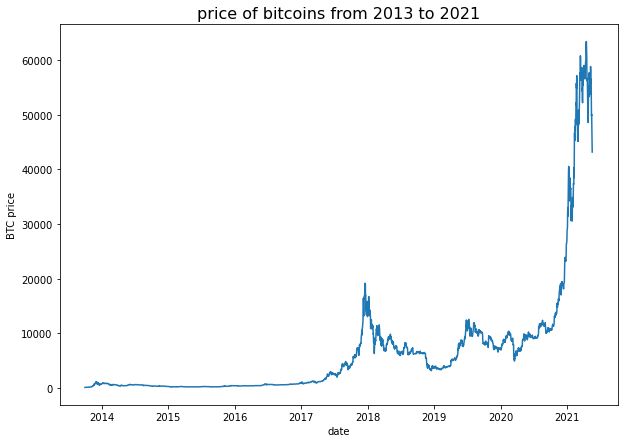

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10,7))
plt.plot(timesteps, btc_price)
plt.ylabel('BTC price')
plt.title('price of bitcoins from 2013 to 2021', fontsize= 16)
plt.xlabel('date')

## Format data part 1: create train and test set of our time series data

### creating train and test sets with time series data( the wrong way)

In [7]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['price'].to_numpy()

timesteps[:10] , prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( timesteps, prices, test_size=0.2, random_state=42)

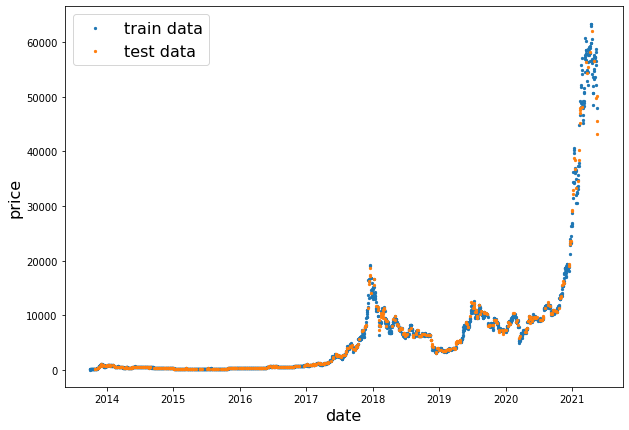

In [9]:
plt.figure(figsize= (10,7))
plt.scatter(X_train, y_train, s= 5, label = 'train data')
plt.scatter(X_test, y_test, s= 5, label= 'test data')
plt.xlabel('date', fontsize = 16)
plt.ylabel('price', fontsize= 16)
plt.legend(fontsize=16)

## Create train and test set for time series dataset ( the right way)

In [10]:
split_size = int(0.8 * len(prices))

X_train, y_train = timesteps[:split_size] , prices[:split_size]

X_test, y_test = timesteps[split_size:] , prices[split_size:]



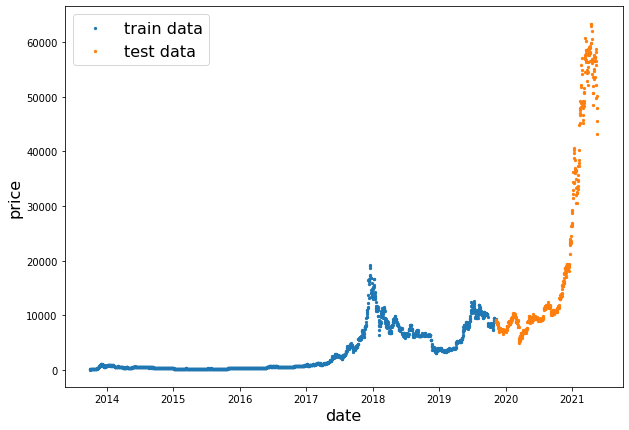

In [11]:
plt.figure(figsize =(10,7))
plt.scatter(X_train, y_train, s= 5, label = 'train data')
plt.scatter(X_test, y_test, s= 5, label= 'test data')
plt.xlabel('date', fontsize = 16)
plt.ylabel('price', fontsize= 16)
plt.legend(fontsize=16)

## Create a ploting function

In [12]:
def plot_time_series(timesteps, values, format = '.', start = 0 , end = None , label= None):

  plt.plot(timesteps[start:end],values[start:end], format, label = label)
  plt.xlabel('Time')
  plt.ylabel('BTC Price')
  if label:
    plt.legend(fontsize= 16)

  plt.grid(True)

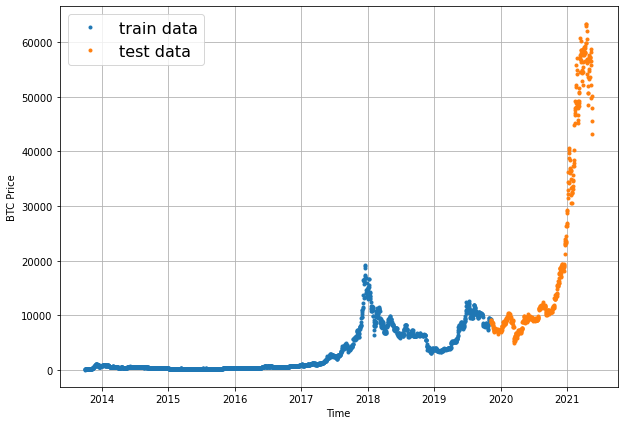

In [13]:
plt.figure(figsize = (10,7))
plot_time_series(timesteps = X_train , values = y_train , label= 'train data')
plot_time_series(X_test, y_test , label= 'test data')

## modelling experiment

### model 0: Naive Forecast(baseline)

In [14]:
naive_forecast = y_test[:-1]

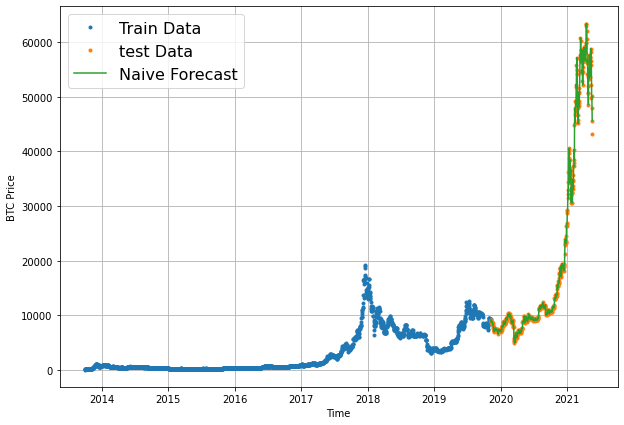

In [15]:
plt.figure(figsize= (10,7))
plot_time_series(X_train,y_train, label= 'Train Data')
plot_time_series(X_test , y_test, label= 'test Data')
plot_time_series(timesteps = X_test[1:], values = naive_forecast, format= '-', label= 'Naive Forecast')

## Evaluating the time series model

In [16]:
import tensorflow as tf

In [17]:
def mean_absolute_scaled_error(y_true,y_pred):
  mae= tf.reduce_mean(tf.abs(y_true - y_pred))
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))

  return mae/mae_naive_no_season

In [18]:
mean_absolute_scaled_error(y_true = y_test[1:], y_pred = naive_forecast).numpy()

0.9995699939182624

In [19]:
def evaluate_preds(y_true,y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype= tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse = tf.sqrt(mae)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase = mean_absolute_scaled_error(y_true,y_pred)

  return{'mae':mae.numpy(),
         'mse':mse.numpy(),
         'rmse':rmse.numpy(),
         'mape':mape.numpy(),
         'mase': mase.numpy()}

In [20]:
naive_results = evaluate_preds(y_true = y_test[1:],
                               y_pred= naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 23.832336,
 'mape': 2.516525,
 'mase': 0.99957}

In [21]:
naive_forecast[-10:]

array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
       56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
       47885.62525472, 45604.61575361])

In [22]:
tf.reduce_mean(y_test)

<tf.Tensor: shape=(), dtype=float64, numpy=20056.632963737222>

In [23]:
tf.reduce_max(y_test), tf.reduce_min(y_test)

(<tf.Tensor: shape=(), dtype=float64, numpy=63346.7890351052>,
 <tf.Tensor: shape=(), dtype=float64, numpy=4944.7023359837>)

## Format data part 2: Windowing the dataset

In [24]:
print(f'we want to use this {btc_price[:7]} to predict this {btc_price[7]}')

we want to use this [123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this 123.033


In [25]:
HORIZON = 1
WINDOW_SIZE = 7

In [26]:
def get_labelled_windows(x, horizon=HORIZON):

  return x[:, :-horizon], x[:, -horizon:]


In [27]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8) +1, axis=0))
print(f' window: {tf.squeeze(test_window)} -->  label: {tf.squeeze(test_label)}') 

 window: [1 2 3 4 5 6 7] -->  label: 8


In [28]:
import numpy as np

def make_windows(x , window_size=WINDOW_SIZE, horizon = HORIZON):
  window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size + horizon - 1)),axis=0).T

  #print(f'window_indexes: \n{window_indexes, window_indexes.shape}')
  windowed_array =  x[window_indexes]

  windows,labels = get_labelled_windows(windowed_array, horizon= horizon)
  return windows,labels


In [29]:
full_windows, full_labels = make_windows(prices, window_size= WINDOW_SIZE, horizon = HORIZON)

In [30]:
for i in range(3):
  print(f'windows: {full_windows[i]} --> labels: {full_labels[i]}')

windows: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] --> labels: [123.033]
windows: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] --> labels: [124.049]
windows: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] --> labels: [125.96116]


## Turning windows into train and test set

In [31]:
def make_train_test_split(windows, labels, test_split=0.2):
  split_size = int(len(windows) * (1- test_split))
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels , test_labels

In [32]:
train_windows,test_windows,train_labels,test_labels = make_train_test_split(full_windows,full_labels)

## making a modelling checkpoint callback

In [33]:
import os

def create_model_checkpoint(model_name, save_path = 'model_experiment'):
  return tf.keras.callbacks.ModelCheckpoint(filepath = os.path.join(save_path, model_name),
                                            verbose = 0,
                                            save_best_only= True)

## model 1 : Dense model (window = 7, horizon = 1)

In [34]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    layers.Dense(128, activation= 'relu'),
    layers.Dense(HORIZON,activation = 'linear')
],name = 'model_1_dense')

model_1.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae','mse'])

model_1.fit(x =train_windows,
            y = train_labels,
            epochs = 100,
            batch_size = 128,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_1.name)])

Epoch 1/100
18/18 [==============================] - 6s 72ms/step - loss: 780.3455 - mae: 780.3455 - mse: 2312725.7500 - val_loss: 2279.6528 - val_mae: 2279.6528 - val_mse: 12772731.0000
Epoch 2/100
18/18 [==============================] - 1s 54ms/step - loss: 247.6756 - mae: 247.6756 - mse: 285481.1875 - val_loss: 1005.9993 - val_mae: 1005.9993 - val_mse: 3441833.2500
Epoch 3/100
18/18 [==============================] - 1s 60ms/step - loss: 188.4116 - mae: 188.4116 - mse: 171891.6094 - val_loss: 923.2862 - val_mae: 923.2861 - val_mse: 2868220.7500
Epoch 4/100
18/18 [==============================] - 1s 70ms/step - loss: 169.4340 - mae: 169.4340 - mse: 151700.5781 - val_loss: 900.5872 - val_mae: 900.5872 - val_mse: 2683715.5000
Epoch 5/100
18/18 [==============================] - 1s 50ms/step - loss: 165.0894 - mae: 165.0894 - mse: 145490.7812 - val_loss: 895.2237 - val_mae: 895.2237 - val_mse: 2564574.5000
Epoch 6/100
18/18 [==============================] - 0s 26ms/step - loss: 158.5

In [35]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 585.9758 - mae: 585.9758 - mse: 1197802.1250


[585.9757690429688, 585.9757690429688, 1197802.125]

In [36]:
model_1 = tf.keras.models.load_model("model_experiment/model_1_dense/")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 568.9510 - mae: 568.9510 - mse: 1171743.6250


[568.9510498046875, 568.9510498046875, 1171743.625]

## Making forecast with a model (on the test dataset )

In [37]:
def make_preds(model, input_data):

  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [38]:
model_1_preds = make_preds(model_1, test_windows)
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8861.71 , 8769.887, 9015.711, 8795.519, 8723.811, 8730.111,
       8691.952, 8502.054, 8460.961, 8516.548], dtype=float32)>

In [39]:
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred = model_1_preds)

In [40]:
model_1_results

{'mae': 568.95105,
 'mse': 1171743.8,
 'rmse': 23.852694,
 'mape': 2.5448983,
 'mase': 0.9994894}

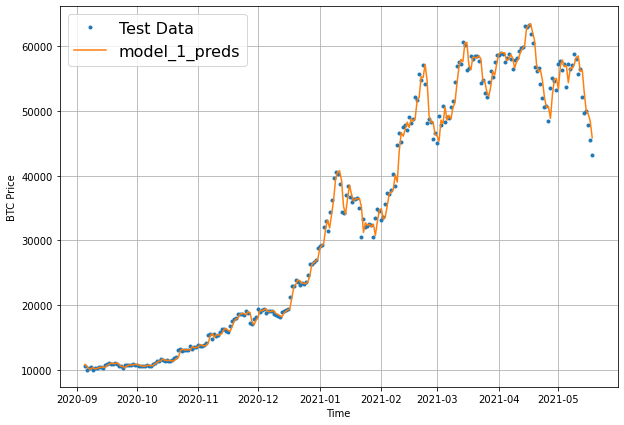

In [41]:
offset = 300
plt.figure(figsize = (10,7))

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values = test_labels[:,0],
                 start = offset, label = "Test Data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values = model_1_preds,
                 start = offset,
                 format = "-",
                 label = "model_1_preds")


## Model 2: Dense(window = 30, horizon = 1)

In [42]:
HORIZON = 1
WINDOW_SIZE = 30

In [43]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)

In [44]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(windows = full_windows,
                                                                               labels =  full_labels,
                                                                               test_split = 0.2)

In [45]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
], name = "model_2_dense")

model_2.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            batch_size = 128,
            epochs = 100,
            verbose =0,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_2.name)])

In [46]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 659.3332


659.3331909179688

In [47]:
model_2 = tf.keras.models.load_model('model_experiment/model_2_dense/')
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 605.8741


605.8740844726562

In [48]:
model_2_preds = make_preds(model_2,
                           input_data = test_windows)

In [49]:
model_2_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_2_preds)


In [50]:
model_2_results

{'mae': 605.8741,
 'mse': 1273360.8,
 'rmse': 24.61451,
 'mape': 2.726445,
 'mase': 1.0590738}

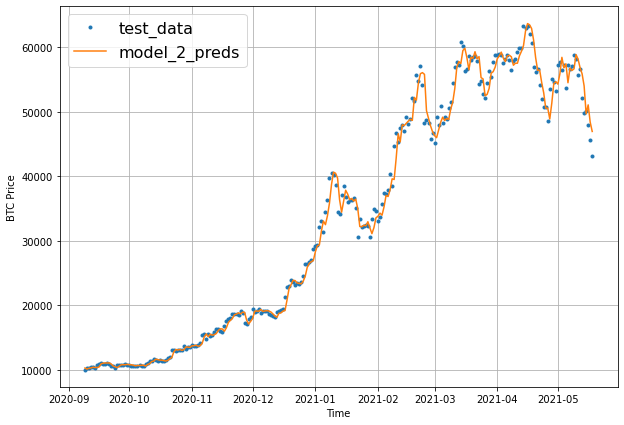

In [51]:
offset =300

plt.figure(figsize= (10,7))

plot_time_series(timesteps= X_test[-len(test_windows):],
                 values = test_labels[:,0],
                 start = offset,
                 label = "test_data")

plot_time_series(timesteps = X_test[-len(test_windows):],
                 values = model_2_preds,
                 start = offset,
                 format = "-",
                 label = "model_2_preds")

## model 3 : Dense(window =30, horizon = 7)

In [52]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows,full_labels = make_windows(prices, window_size= WINDOW_SIZE , horizon =  HORIZON)

In [53]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(windows = full_windows,
                                                                               labels = full_labels)

In [54]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(HORIZON)
],name = 'model_3_dense')

model_3.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size= 128,
            epochs =100,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_3.name)])


Epoch 1/100
18/18 [==============================] - 1s 41ms/step - loss: 1476.6752 - val_loss: 3088.5613
Epoch 2/100
18/18 [==============================] - 0s 26ms/step - loss: 552.8943 - val_loss: 2462.4548
Epoch 3/100
18/18 [==============================] - 0s 24ms/step - loss: 435.1978 - val_loss: 2283.1484
Epoch 4/100
18/18 [==============================] - 0s 26ms/step - loss: 391.9787 - val_loss: 1975.1218
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 357.9485 - val_loss: 2000.1556
Epoch 6/100
18/18 [==============================] - 0s 25ms/step - loss: 332.6704 - val_loss: 1723.4186
Epoch 7/100
18/18 [==============================] - 0s 24ms/step - loss: 309.9903 - val_loss: 1591.9688
Epoch 8/100
18/18 [==============================] - 0s 26ms/step - loss: 302.4123 - val_loss: 1579.8518
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 293.9170 - val_loss: 1602.9116
Epoch 10/100
18/18 [==============================] - 0s

In [55]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1300.1522


1300.1522216796875

In [56]:
model_3 = tf.keras.models.load_model('model_experiment/model_3_dense/')
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1237.5065


1237.5064697265625

In [57]:
model_3_preds = make_preds(model_3,
                           input_data = test_windows)

model_3_preds[:3]

<tf.Tensor: shape=(3, 7), dtype=float32, numpy=
array([[9004.694 , 9048.1   , 9425.09  , 9258.256 , 9495.797 , 9558.453 ,
        9357.3545],
       [8735.506 , 8840.303 , 9247.793 , 8885.601 , 9097.186 , 9174.327 ,
        9156.818 ],
       [8672.508 , 8782.387 , 9123.857 , 8770.371 , 9007.13  , 9003.869 ,
        9042.725 ]], dtype=float32)>

In [58]:
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred =  model_3_preds)

model_3_results

{'mae': array([ 513.6056  ,  355.08328 ,  327.17075 ,  358.5106  ,  420.53305 ,
         537.854   ,  545.6617  ,  485.9228  ,  584.49713 ,  687.38214 ,
         836.2264  ,  755.1577  ,  731.4957  ,  775.3399  ,  567.95544 ,
         266.80865 ,  188.80217 ,  188.10799 ,  253.095   ,  301.43256 ,
         151.10721 ,  196.81473 ,  191.46178 ,  231.65031 ,  143.61125 ,
         122.59089 ,  132.78879 ,  190.8118  ,  179.15994 ,  228.26018 ,
         314.44022 ,  379.09244 ,  278.32526 ,  295.3471  ,  299.3852  ,
         248.64983 ,  299.75662 ,  259.69434 ,  180.30531 ,  206.72922 ,
         374.62863 ,  144.85086 ,  142.33635 ,  131.11613 ,   93.9412  ,
          54.825542,   73.79548 ,  103.60128 ,  121.333916,  168.67278 ,
         183.90945 ,  152.25307 ,  186.57199 ,  146.91267 ,  240.42912 ,
         351.00662 ,  540.952   ,  549.1573  ,  521.2411  ,  526.8554  ,
         453.36237 ,  257.98102 ,  277.29486 ,  301.8247  ,  455.718   ,
         458.96017 ,  503.4438  ,  522.3119 

## make our evaluation function work for larger horizons

In [59]:
tf.reduce_mean(model_3_results['mae']).numpy()

1237.5063

In [60]:
def evaluate_preds(y_true,y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype= tf.float32)

  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse = tf.sqrt(mae)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase = mean_absolute_scaled_error(y_true,y_pred)

  if mae.ndim >0:
    mae = tf.reduce_mean(mae)
    mse =tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return{'mae':mae.numpy(),
         'mse':mse.numpy(),
         'rmse':rmse.numpy(),
         'mape':mape.numpy(),
         'mase': mase.numpy()}

In [61]:
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_3_preds)
model_3_results

{'mae': 1237.5063,
 'mse': 5405198.5,
 'rmse': 29.735102,
 'mape': 5.5588784,
 'mase': 2.2020733}

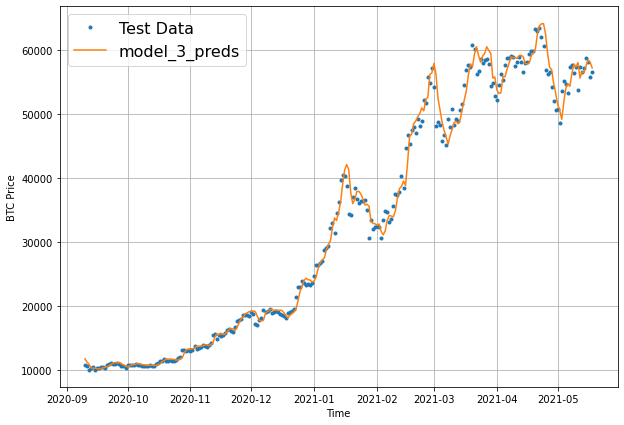

In [62]:
offset = 300

plt.figure(figsize = (10,7))

plot_time_series(timesteps = X_test[-len(test_windows):], values = test_labels[:,0], start = offset, label = 'Test Data')

plot_time_series(timesteps =X_test[-len(test_windows):], values = tf.reduce_mean(model_3_preds, axis=1) ,start = offset,format='-', label = 'model_3_preds' )

## Which of our model performing best so far

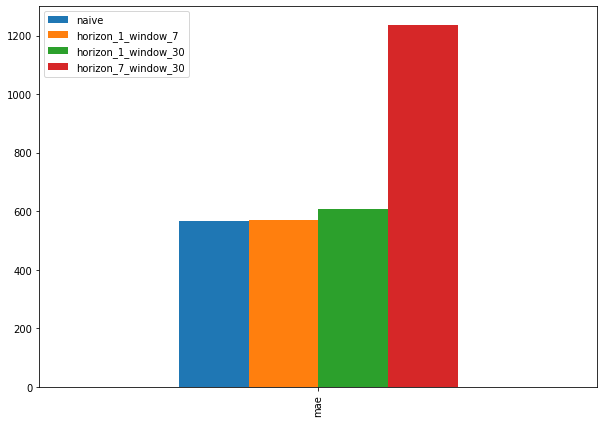

In [63]:
pd.DataFrame({'naive':naive_results['mae'],
              'horizon_1_window_7':model_1_results['mae'],
              'horizon_1_window_30':model_2_results['mae'],
              'horizon_7_window_30': model_3_results['mae']},index = ['mae']).plot(figsize=(10,7),kind = "bar");

## model 4: Conv1D

In [64]:
HORIZON = 1
WINDOW_SIZE = 7

full_windows,full_labels = make_windows(prices, window_size=WINDOW_SIZE,horizon=HORIZON)

In [65]:
train_windows, test_windows, train_labels, test_labels = make_train_test_split(full_windows, full_labels)

In [66]:
train_windows[0].shape

(7,)

In [67]:
x = tf.constant(train_windows[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [68]:
expand_dims_layer  = layers.Lambda(lambda x : tf.expand_dims(x, axis = 1))

In [69]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x : tf.expand_dims(x, axis= 1)),
    layers.Conv1D(filters = 128, kernel_size = 5, strides=1, padding= 'causal', activation = 'relu'),
    layers.Dense(HORIZON)
] , name = "model_4_conv1d")

model_4.compile(loss = "mae",
              optimizer = tf.keras.optimizers.Adam())

model_4.fit(train_windows,
          train_labels,
          batch_size = 128,
          epochs = 100,
          verbose = 1,
          validation_data = (test_windows, test_labels),
          callbacks = [create_model_checkpoint(model_name = 'model_4_conv1d') ])

Epoch 1/100
18/18 [==============================] - 7s 53ms/step - loss: 1207.3817 - val_loss: 2320.6218
Epoch 2/100
18/18 [==============================] - 1s 36ms/step - loss: 316.2171 - val_loss: 1467.2799
Epoch 3/100
18/18 [==============================] - 1s 35ms/step - loss: 192.6853 - val_loss: 1164.7074
Epoch 4/100
18/18 [==============================] - 1s 35ms/step - loss: 177.3535 - val_loss: 981.6695
Epoch 5/100
18/18 [==============================] - 1s 36ms/step - loss: 172.3467 - val_loss: 960.8708
Epoch 6/100
18/18 [==============================] - 1s 65ms/step - loss: 171.9753 - val_loss: 950.2026
Epoch 7/100
18/18 [==============================] - 1s 88ms/step - loss: 167.1943 - val_loss: 943.2872
Epoch 8/100
18/18 [==============================] - 1s 57ms/step - loss: 163.5990 - val_loss: 905.5262
Epoch 9/100
18/18 [==============================] - 0s 4ms/step - loss: 162.5455 - val_loss: 929.7607
Epoch 10/100
18/18 [==============================] - 1s 36ms

In [70]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 610.1541


610.154052734375

In [71]:
model_4 = tf.keras.models.load_model("model_experiment/model_4_conv1d/")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 570.8284


570.828369140625

In [72]:
model_4_preds = make_preds(model_4, test_windows)

model_4_preds[:4]

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([8851.464, 8754.47 , 8983.927, 8759.671], dtype=float32)>

In [73]:
model_4_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_4_preds)

model_4_results

{'mae': 570.82837,
 'mse': 1176671.2,
 'rmse': 23.892014,
 'mape': 2.5593357,
 'mase': 1.0027874}

## model 5: RNN (LSTM)

In [74]:
tf.random.set_seed(42)

inputs = layers.Input(shape = (WINDOW_SIZE))
x = layers.Lambda(lambda x : tf.expand_dims(x, axis= 1))(inputs)
#x = layers.LSTM(128, return_sequences = True)(x)
x =layers.LSTM(128, activation = 'relu')(x)
#x = layers.Dense(32, activation = 'relus')(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs= inputs, outputs = output , name = 'model_5_LSTM')

model_5.compile(loss = 'mae',
                optimizer = tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            batch_size = 128,
            epochs = 100,
            validation_data = (test_windows, test_labels),
            callbacks = [create_model_checkpoint(model_name = model_5.name)])

Epoch 1/100
 9/18 [==============>...............] - ETA: 0s - loss: 2600.4553 

18/18 [==============================] - 3s 112ms/step - loss: 2323.6082 - val_loss: 9222.6523
Epoch 2/100
11/18 [=================>............] - ETA: 0s - loss: 947.0196 

18/18 [==============================] - 2s 101ms/step - loss: 695.4739 - val_loss: 1486.0555
Epoch 3/100
11/18 [=================>............] - ETA: 0s - loss: 270.4985

18/18 [==============================] - 2s 120ms/step - loss: 237.3967 - val_loss: 1298.9084
Epoch 4/100
11/18 [=================>............] - ETA: 0s - loss: 196.5330

18/18 [==============================] - 2s 101ms/step - loss: 181.9180 - val_loss: 966.6431
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 173.4022 - val_loss: 970.9295
Epoch 6/100
11/18 [=================>............] - ETA: 0s - loss: 169.3568

18/18 [==============================] - 2s 126ms/step - loss: 173.5414 - val_loss: 941.4746
Epoch 7/100
18/18 [==============================] - ETA: 0s - loss: 170.3566

18/18 [==============================] - 2s 139ms/step - loss: 170.3566 - val_loss: 898.5215
Epoch 8/100
18/18 [==============================] - 0s 6ms/step - loss: 157.6712 - val_loss: 914.8642
Epoch 9/100
18/18 [==============================] - 0s 7ms/step - loss: 166.5143 - val_loss: 1079.0776
Epoch 10/100
12/18 [===================>..........] - ETA: 0s - loss: 163.3890

18/18 [==============================] - 2s 100ms/step - loss: 162.3369 - val_loss: 877.1690
Epoch 11/100
18/18 [==============================] - 0s 7ms/step - loss: 163.0841 - val_loss: 924.1126
Epoch 12/100
18/18 [==============================] - 0s 6ms/step - loss: 168.5598 - val_loss: 941.6025
Epoch 13/100
18/18 [==============================] - 0s 8ms/step - loss: 166.4726 - val_loss: 934.8436
Epoch 14/100
18/18 [==============================] - 0s 7ms/step - loss: 163.9537 - val_loss: 920.2160
Epoch 15/100
12/18 [===================>..........] - ETA: 0s - loss: 148.5054

18/18 [==============================] - 2s 101ms/step - loss: 152.9470 - val_loss: 856.2653
Epoch 16/100
18/18 [==============================] - 0s 7ms/step - loss: 147.4420 - val_loss: 898.9914
Epoch 17/100
18/18 [==============================] - 0s 6ms/step - loss: 151.0533 - val_loss: 943.1418
Epoch 18/100
18/18 [==============================] - 0s 7ms/step - loss: 157.8232 - val_loss: 924.0046
Epoch 19/100
18/18 [==============================] - 0s 6ms/step - loss: 155.9198 - val_loss: 911.4753
Epoch 20/100
18/18 [==============================] - 0s 6ms/step - loss: 155.6456 - val_loss: 862.6680
Epoch 21/100
18/18 [==============================] - 0s 7ms/step - loss: 153.1514 - val_loss: 862.5831
Epoch 22/100
18/18 [==============================] - 0s 6ms/step - loss: 151.4883 - val_loss: 863.8172
Epoch 23/100
18/18 [==============================] - 0s 7ms/step - loss: 150.7770 - val_loss: 886.8356
Epoch 24/100
18/18 [==============================] - 0s 7ms/step - loss: 1

18/18 [==============================] - 2s 100ms/step - loss: 146.8467 - val_loss: 845.2782
Epoch 26/100
12/18 [===================>..........] - ETA: 0s - loss: 146.2229

18/18 [==============================] - 2s 123ms/step - loss: 145.9843 - val_loss: 818.6807
Epoch 27/100
12/18 [===================>..........] - ETA: 0s - loss: 150.8635

18/18 [==============================] - 2s 101ms/step - loss: 144.4289 - val_loss: 804.3279
Epoch 28/100
11/18 [=================>............] - ETA: 0s - loss: 145.3607

18/18 [==============================] - 2s 100ms/step - loss: 142.4610 - val_loss: 789.0859
Epoch 29/100
18/18 [==============================] - 0s 7ms/step - loss: 141.8739 - val_loss: 806.6758
Epoch 30/100
18/18 [==============================] - 0s 7ms/step - loss: 142.0521 - val_loss: 794.8836
Epoch 31/100
11/18 [=================>............] - ETA: 0s - loss: 138.5929

18/18 [==============================] - 2s 100ms/step - loss: 138.4690 - val_loss: 773.2812
Epoch 32/100
11/18 [=================>............] - ETA: 0s - loss: 137.6196

18/18 [==============================] - 2s 121ms/step - loss: 137.1986 - val_loss: 772.2625
Epoch 33/100
18/18 [==============================] - 0s 7ms/step - loss: 135.9342 - val_loss: 786.4805
Epoch 34/100
11/18 [=================>............] - ETA: 0s - loss: 142.0283

18/18 [==============================] - 2s 101ms/step - loss: 136.1931 - val_loss: 744.4506
Epoch 35/100
18/18 [==============================] - 0s 8ms/step - loss: 133.4513 - val_loss: 756.2970
Epoch 36/100
12/18 [===================>..........] - ETA: 0s - loss: 132.2655

18/18 [==============================] - 2s 101ms/step - loss: 134.0992 - val_loss: 735.1729
Epoch 37/100
18/18 [==============================] - 0s 7ms/step - loss: 130.6932 - val_loss: 745.9099
Epoch 38/100
12/18 [===================>..........] - ETA: 0s - loss: 133.6792

18/18 [==============================] - 2s 101ms/step - loss: 129.2891 - val_loss: 717.2498
Epoch 39/100
18/18 [==============================] - 0s 7ms/step - loss: 129.6088 - val_loss: 719.0665
Epoch 40/100
18/18 [==============================] - 0s 7ms/step - loss: 129.6111 - val_loss: 732.0632
Epoch 41/100
12/18 [===================>..........] - ETA: 0s - loss: 130.4034

18/18 [==============================] - 2s 120ms/step - loss: 127.1393 - val_loss: 702.9354
Epoch 42/100
12/18 [===================>..........] - ETA: 0s - loss: 124.3230

18/18 [==============================] - 2s 103ms/step - loss: 125.6113 - val_loss: 700.8702
Epoch 43/100
18/18 [==============================] - 0s 6ms/step - loss: 125.9959 - val_loss: 704.3682
Epoch 44/100
12/18 [===================>..........] - ETA: 0s - loss: 124.8729

18/18 [==============================] - 2s 103ms/step - loss: 125.2241 - val_loss: 698.7766
Epoch 45/100
11/18 [=================>............] - ETA: 0s - loss: 121.2221

18/18 [==============================] - 2s 102ms/step - loss: 122.5007 - val_loss: 683.0590
Epoch 46/100
12/18 [===================>..........] - ETA: 0s - loss: 130.0215

18/18 [==============================] - 2s 123ms/step - loss: 124.4726 - val_loss: 679.1873
Epoch 47/100
18/18 [==============================] - 0s 7ms/step - loss: 122.1862 - val_loss: 705.4241
Epoch 48/100
11/18 [=================>............] - ETA: 0s - loss: 120.7927

18/18 [==============================] - 2s 102ms/step - loss: 122.0458 - val_loss: 677.0784
Epoch 49/100
11/18 [=================>............] - ETA: 0s - loss: 127.1128

18/18 [==============================] - 2s 102ms/step - loss: 121.1548 - val_loss: 674.6848
Epoch 50/100
18/18 [==============================] - 0s 6ms/step - loss: 122.8890 - val_loss: 691.4816
Epoch 51/100
18/18 [==============================] - 0s 7ms/step - loss: 122.2994 - val_loss: 737.3929
Epoch 52/100
12/18 [===================>..........] - ETA: 0s - loss: 129.3352

18/18 [==============================] - 2s 100ms/step - loss: 121.2944 - val_loss: 657.2365
Epoch 53/100
12/18 [===================>..........] - ETA: 0s - loss: 116.8399

18/18 [==============================] - 2s 122ms/step - loss: 119.7668 - val_loss: 652.7970
Epoch 54/100
18/18 [==============================] - 0s 7ms/step - loss: 120.1222 - val_loss: 654.4439
Epoch 55/100
12/18 [===================>..........] - ETA: 0s - loss: 125.5305

18/18 [==============================] - 2s 103ms/step - loss: 119.2566 - val_loss: 647.2831
Epoch 56/100
12/18 [===================>..........] - ETA: 0s - loss: 121.4963

18/18 [==============================] - 2s 101ms/step - loss: 120.0544 - val_loss: 643.7808
Epoch 57/100
18/18 [==============================] - 0s 7ms/step - loss: 123.1243 - val_loss: 671.1797
Epoch 58/100
18/18 [==============================] - ETA: 0s - loss: 118.4059

18/18 [==============================] - 2s 102ms/step - loss: 118.4059 - val_loss: 640.2656
Epoch 59/100
18/18 [==============================] - 0s 6ms/step - loss: 117.7119 - val_loss: 645.3837
Epoch 60/100
12/18 [===================>..........] - ETA: 0s - loss: 117.1983

18/18 [==============================] - 2s 120ms/step - loss: 118.5346 - val_loss: 638.7429
Epoch 61/100
18/18 [==============================] - 0s 7ms/step - loss: 118.3129 - val_loss: 689.4144
Epoch 62/100
18/18 [==============================] - 0s 7ms/step - loss: 121.4350 - val_loss: 748.5565
Epoch 63/100
18/18 [==============================] - 0s 7ms/step - loss: 123.1006 - val_loss: 651.8298
Epoch 64/100
18/18 [==============================] - 0s 7ms/step - loss: 115.9679 - val_loss: 672.9166
Epoch 65/100
11/18 [=================>............] - ETA: 0s - loss: 120.7008

18/18 [==============================] - 2s 101ms/step - loss: 118.8341 - val_loss: 631.7538
Epoch 66/100
18/18 [==============================] - 0s 6ms/step - loss: 116.2212 - val_loss: 634.5445
Epoch 67/100
12/18 [===================>..........] - ETA: 0s - loss: 113.0850

18/18 [==============================] - 2s 103ms/step - loss: 116.1580 - val_loss: 623.8932
Epoch 68/100
18/18 [==============================] - 0s 6ms/step - loss: 115.5543 - val_loss: 635.4929
Epoch 69/100
18/18 [==============================] - 0s 7ms/step - loss: 120.5866 - val_loss: 626.3387
Epoch 70/100
18/18 [==============================] - ETA: 0s - loss: 114.9188

18/18 [==============================] - 2s 106ms/step - loss: 114.9188 - val_loss: 619.3181
Epoch 71/100
18/18 [==============================] - 0s 7ms/step - loss: 114.8998 - val_loss: 650.9373
Epoch 72/100
18/18 [==============================] - 0s 7ms/step - loss: 118.2033 - val_loss: 630.5287
Epoch 73/100
18/18 [==============================] - 0s 7ms/step - loss: 115.3612 - val_loss: 623.0369
Epoch 74/100
18/18 [==============================] - 0s 7ms/step - loss: 115.0345 - val_loss: 623.0776
Epoch 75/100
18/18 [==============================] - 0s 7ms/step - loss: 115.2057 - val_loss: 640.5281
Epoch 76/100
11/18 [=================>............] - ETA: 0s - loss: 114.5117

18/18 [==============================] - 2s 122ms/step - loss: 114.1402 - val_loss: 614.4062
Epoch 77/100
18/18 [==============================] - 0s 7ms/step - loss: 115.5973 - val_loss: 689.8776
Epoch 78/100
18/18 [==============================] - 0s 7ms/step - loss: 117.2611 - val_loss: 645.2790
Epoch 79/100
12/18 [===================>..........] - ETA: 0s - loss: 112.1790

18/18 [==============================] - 2s 100ms/step - loss: 114.1995 - val_loss: 608.7159
Epoch 80/100
18/18 [==============================] - 0s 6ms/step - loss: 112.7125 - val_loss: 614.9222
Epoch 81/100
18/18 [==============================] - 0s 7ms/step - loss: 113.3684 - val_loss: 634.8466
Epoch 82/100
11/18 [=================>............] - ETA: 0s - loss: 122.9989

18/18 [==============================] - 2s 101ms/step - loss: 115.9701 - val_loss: 607.8510
Epoch 83/100
18/18 [==============================] - 0s 7ms/step - loss: 113.3599 - val_loss: 628.8181
Epoch 84/100
18/18 [==============================] - 0s 7ms/step - loss: 114.4113 - val_loss: 628.5579
Epoch 85/100
18/18 [==============================] - 0s 6ms/step - loss: 114.8363 - val_loss: 634.7715
Epoch 86/100
18/18 [==============================] - 0s 7ms/step - loss: 115.5462 - val_loss: 613.5223
Epoch 87/100
12/18 [===================>..........] - ETA: 0s - loss: 115.3621

18/18 [==============================] - 2s 118ms/step - loss: 112.5059 - val_loss: 604.7603
Epoch 88/100
11/18 [=================>............] - ETA: 0s - loss: 114.8154

18/18 [==============================] - 2s 100ms/step - loss: 111.7706 - val_loss: 601.5748
Epoch 89/100
18/18 [==============================] - 0s 6ms/step - loss: 111.8470 - val_loss: 624.0131
Epoch 90/100
18/18 [==============================] - 0s 7ms/step - loss: 115.6354 - val_loss: 662.9452
Epoch 91/100
18/18 [==============================] - 0s 7ms/step - loss: 116.1836 - val_loss: 636.0310
Epoch 92/100
18/18 [==============================] - 0s 6ms/step - loss: 113.1700 - val_loss: 606.0366
Epoch 93/100
11/18 [=================>............] - ETA: 0s - loss: 113.7486

18/18 [==============================] - 2s 101ms/step - loss: 112.4748 - val_loss: 599.8319
Epoch 94/100
18/18 [==============================] - 0s 7ms/step - loss: 111.2637 - val_loss: 601.3256
Epoch 95/100
12/18 [===================>..........] - ETA: 0s - loss: 109.0149

18/18 [==============================] - 2s 101ms/step - loss: 111.0185 - val_loss: 597.1485
Epoch 96/100
18/18 [==============================] - 0s 7ms/step - loss: 112.3787 - val_loss: 601.1596
Epoch 97/100
18/18 [==============================] - 0s 6ms/step - loss: 111.4700 - val_loss: 626.1573
Epoch 98/100
18/18 [==============================] - 0s 7ms/step - loss: 111.7326 - val_loss: 601.0142
Epoch 99/100
10/18 [===============>..............] - ETA: 0s - loss: 110.0461

18/18 [==============================] - 2s 122ms/step - loss: 110.7480 - val_loss: 594.6030
Epoch 100/100
18/18 [==============================] - 0s 7ms/step - loss: 111.9943 - val_loss: 595.9847


In [75]:
model_5 = tf.keras.models.load_model('model_experiment/model_5_LSTM')
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 594.6030


594.6029663085938

In [76]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:5]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8978.46 , 8810.951, 8997.779, 8836.308, 8731.047], dtype=float32)>

In [77]:
model_5_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_5_preds)

model_5_results

{'mae': 594.60297,
 'mse': 1267231.9,
 'rmse': 24.384481,
 'mape': 2.6717565,
 'mase': 1.0445527}

In [78]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 23.832336,
 'mape': 2.516525,
 'mase': 0.99957}

## Make a multi-variate time series Dataset

In [79]:
bitcoin_prices.head()

,price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [80]:
block_reward_1 = 50
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25


block_reward_2_datetime = np.datetime64("2012-11-08")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [81]:
block_reward_3_datetime

numpy.datetime64('2016-07-09')

In [82]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days

block_reward_2_days, block_reward_3_days

(1012, 2421)

In [83]:
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_reward'] = None

In [84]:
bitcoin_prices_block.iloc[:block_reward_2_days,-1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days,-1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:,-1] = block_reward_4

In [85]:
bitcoin_prices_block.tail()

,price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


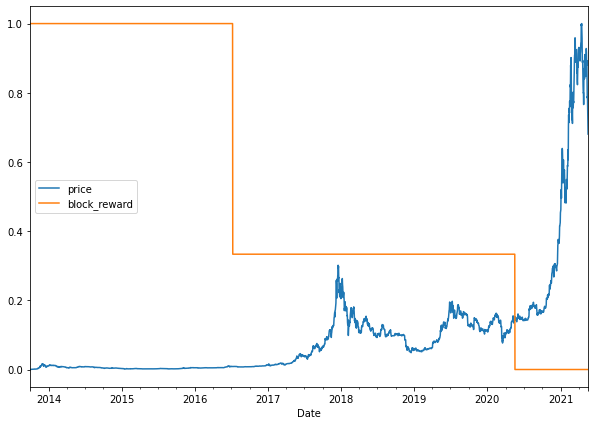

In [86]:
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[['price','block_reward']]),
                                     columns = bitcoin_prices_block.columns,
                                     index = bitcoin_prices_block.index)

scaled_price_block_df.plot(figsize=(10,7))

## Making a windowed dataset with pandas

In [87]:
HORIZON = 1
WINDOW_SIZE = 7

In [88]:
 bitcoin_prices_windowed = bitcoin_prices_block.copy()

In [89]:
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f'Price+{i +1}'] = bitcoin_prices_windowed['price'].shift(periods=i+1)

In [90]:
bitcoin_prices_windowed.head()

,price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [91]:
X = bitcoin_prices_windowed.dropna().drop('price', axis = 1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['price'].astype(np.float32)

In [92]:
split_size = int(len(X) * 0.8)
X_train,y_train = X[:split_size], y[:split_size]
X_test,y_test = X[split_size:] , y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

## Model 6: Dense(multivariate Time Series)

In [93]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, 'relu'),
    tf.keras.layers.Dense(HORIZON)
], name = "model_6_dense_multivariate")

model_6.compile(loss = "mae",
                optimizer = tf.keras.optimizers.Adam())

model_6.fit(X_train,y_train,
            batch_size =128,
            epochs = 100,
            validation_data = (X_test,y_test),
            callbacks = [create_model_checkpoint(model_name = model_6.name)])

Epoch 1/100
18/18 [==============================] - 1s 31ms/step - loss: 1234.6804 - val_loss: 2061.9077
Epoch 2/100
18/18 [==============================] - 0s 23ms/step - loss: 351.5053 - val_loss: 1908.6733
Epoch 3/100
18/18 [==============================] - 0s 25ms/step - loss: 235.4153 - val_loss: 1329.0585
Epoch 4/100
18/18 [==============================] - 0s 26ms/step - loss: 208.6112 - val_loss: 1102.1342
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 196.5770 - val_loss: 1107.8474
Epoch 6/100
18/18 [==============================] - 0s 26ms/step - loss: 187.2245 - val_loss: 1036.1720
Epoch 7/100
18/18 [==============================] - 0s 24ms/step - loss: 182.0245 - val_loss: 1019.2928
Epoch 8/100
18/18 [==============================] - 0s 26ms/step - loss: 175.7059 - val_loss: 977.8488
Epoch 9/100
18/18 [==============================] - 0s 24ms/step - loss: 170.1784 - val_loss: 954.4037
Epoch 10/100
18/18 [==============================] - 0s 

In [94]:
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 626.7440


626.7440185546875

In [95]:
model_6 = tf.keras.models.load_model('model_experiment/model_6_dense_multivariate/')
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 567.8899


567.889892578125

In [96]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8844.684, 8769.905, 9045.17 , 8747.686, 8728.429, 8772.757,
       8667.292, 8503.437, 8470.313, 8527.244], dtype=float32)>

In [97]:
model_6_results = evaluate_preds(y_true = y_test,
                                 y_pred = model_6_preds)

model_6_results

{'mae': 567.8899,
 'mse': 1164816.4,
 'rmse': 23.83044,
 'mape': 2.5460758,
 'mase': 0.99762523}

In [98]:
model_1_results

{'mae': 568.95105,
 'mse': 1171743.8,
 'rmse': 23.852694,
 'mape': 2.5448983,
 'mase': 0.9994894}

## model 7 : N-BEATS algorithm

### Building and testing the N-BEATS block layer

In [99]:
# Create NBeatBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, 
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and the forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [100]:
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [101]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [102]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [ 0.07960171  0.32512033 -0.8428683  -0.6938985  -0.31720552 -0.5698734
 -0.6396662 ]
Forecast: 1.0071648359298706


### Preparing the data of N-BEATS algorithm using `tf.data`

In [103]:
HORIZON = 1
WINDOW_SIZE = 7 

In [104]:
bitcoin_prices.head()

,price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [106]:
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["price"].shift(periods=i+1)
bitcoin_prices_nbeats.head()

,price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [108]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("price", axis=1)
y = bitcoin_prices_nbeats.dropna()["price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [109]:
# Time to make our dataset performant using tf.data API
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine labels and features by zipping together -> (features, labels)
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# Batch and prefetch
BATCH_SIZE = 1024
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

## setting up  hyperparameters for N_BEATS algorithm

In [110]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4 
N_STACKS = 30 

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

### Getting ready for residual connection

In [111]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

# Get outputs
print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


## Building, compiling and fitting the N-BEATS algorithm

In [112]:
%%time

tf.random.set_seed(42)

# 1. Setup and instance of NBeatsBlock
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE, 
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stack
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards prediction + horizon prediction)
residuals, forecast = nbeats_block_layer(stack_input)

# 4. Create stacks of block layers
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already created in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as the forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass in the residuals

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, outputs=forecast, name="model_7_NBEATS")

# 8. Compile model with MAE loss
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                            patience=100,
                                                            verbose=1)])


Epoch 729: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 1059: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 1159: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
CPU times: user 3min 16s, sys: 6.34 s, total: 3min 22s
Wall time: 3min 48s


In [113]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 20ms/step - loss: 579.0383


579.038330078125

In [114]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:7]

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([8848.575, 8775.048, 9025.548, 8769.933, 8743.684, 8742.767,
       8661.999], dtype=float32)>

In [115]:
model_7_results = evaluate_preds(y_true = y_test,
                                 y_pred = model_7_preds)

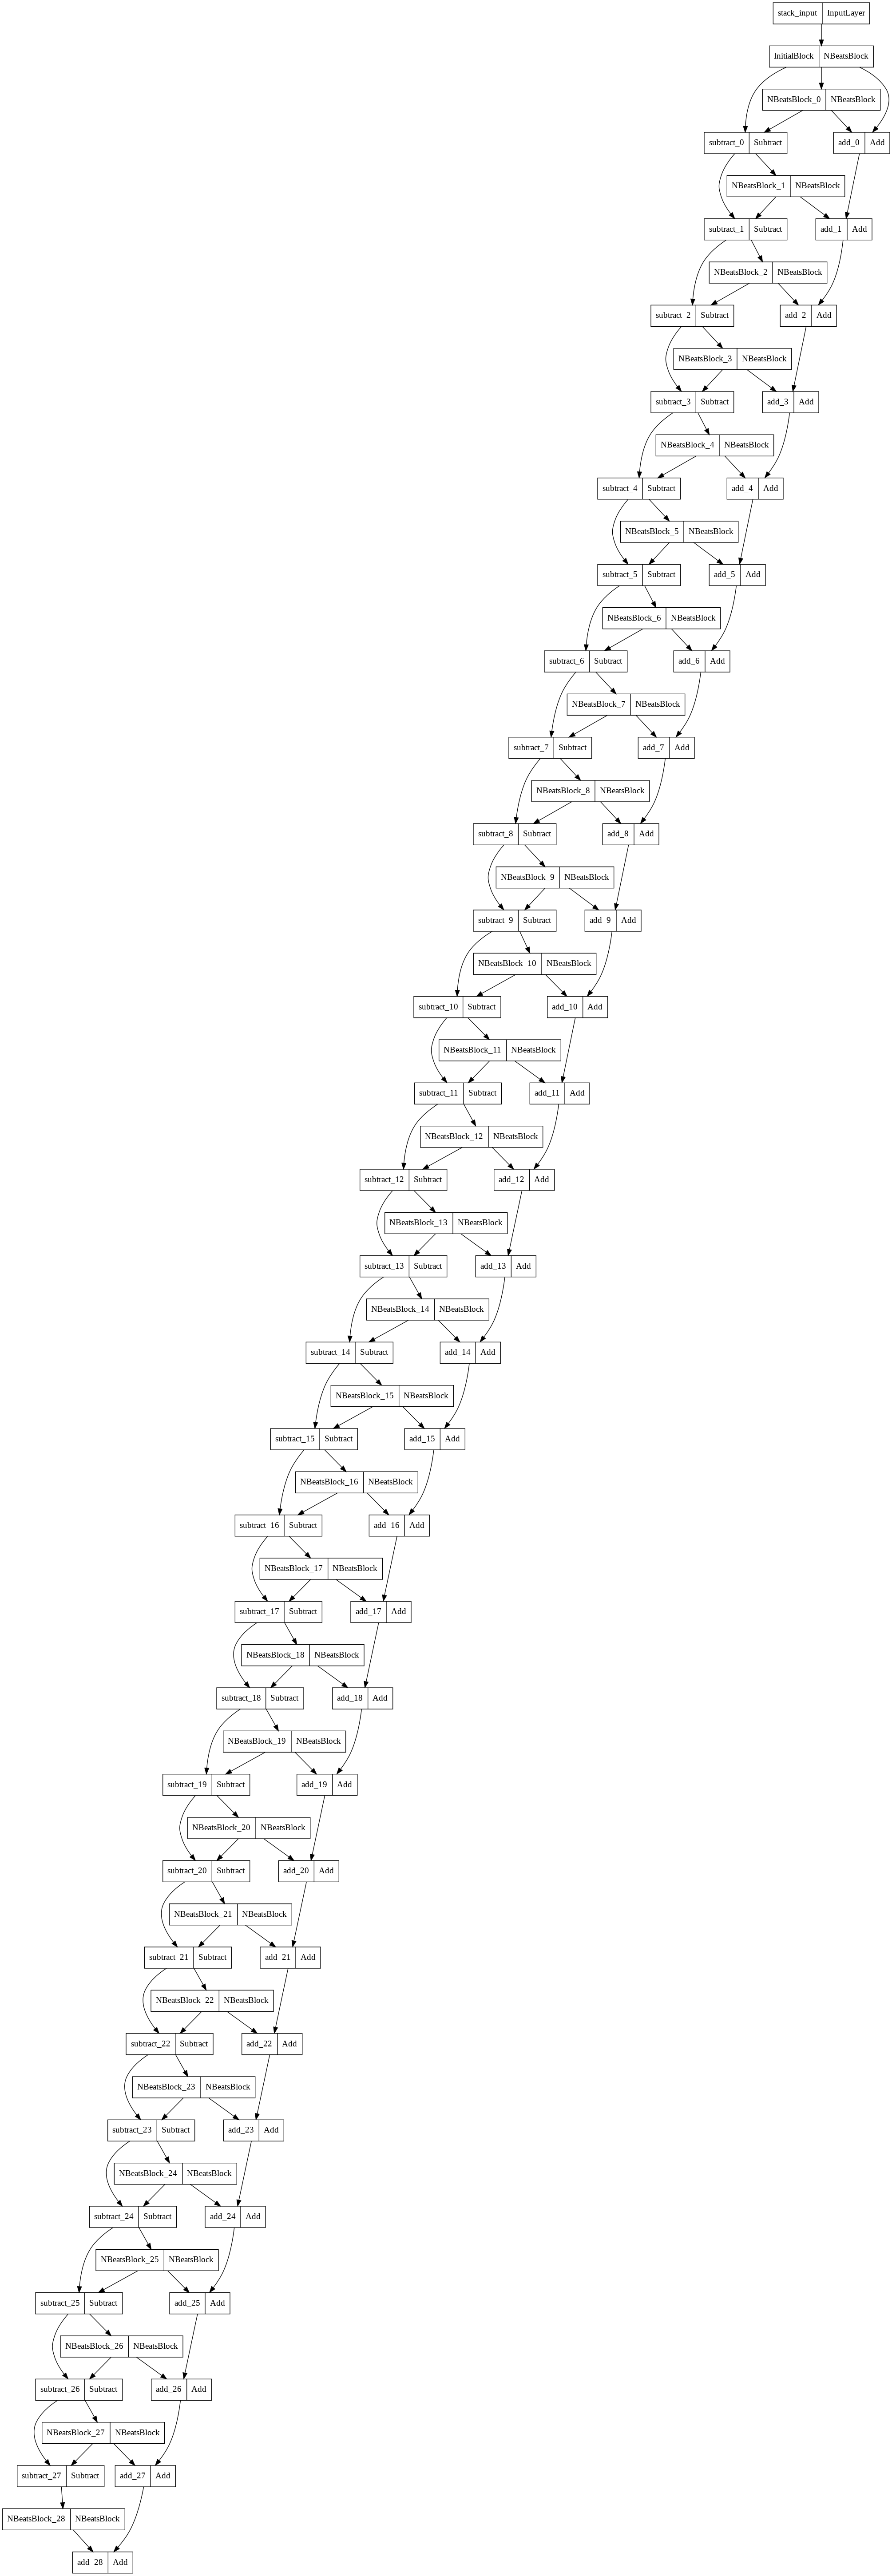

In [116]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)